___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Victor Arruda Niubó

#### Giovanni Pertence Cardoso dos Santos

#### Gustavo Schlieper Tessitore

#### Leonardo Cesari Costa
___

# Previsão da quantidade de views

___

## 1. INTRODUÇÃO

O objetivo do projeto é estimar a quantidade de visualizações que um vídeo terá com base no título, horário de publicação e as tags atribuidas aos vídeos.

___
## 2. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import itertools
import math
import json
import os
from scipy.stats import norm

In [51]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gugat\Desktop\Insper DS 2018.1\2.1 semestre\Dados\cdados_dp\P3


### BASE DE DADOS

In [135]:
# Base de dados dos videos em destaque do youtube US
you_data = pd.read_csv("USvideos.csv")
# jason que contém a relação id - categoria
ids = json.loads(open('US_category_id.json').read())

# filtro das variáveis de interesse
you_analysis = you_data.loc[you_data.views|you_data.title|you_data.tags|you_data.category_id,\
                           ['views', 'title', 'tags', 'category_id']]

you_analysis.head()

,views,title,tags,category_id
0,748374,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,22
1,2418783,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,24
2,3191434,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,23
3,343168,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,24
4,2095731,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,24


In [142]:
# separação da string das tags em uma lista de strings
tags_split = you_analysis.tags.str.split(pat = '|')
you_analysis['tags_split'] = tags_split
you_analysis.head()

,views,title,tags,category_id,tags_split
0,748374,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,22,[SHANtell martin]
1,2418783,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,24,"[last week tonight trump presidency, last week..."
2,3191434,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,23,"[racist superman, rudy, mancuso, king, bach, r..."
3,343168,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,24,"[rhett and link, gmm, good mythical morning, r..."
4,2095731,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,24,"[ryan, higa, higatv, nigahiga, i dare you, idy..."


In [131]:
# Junta todas as strings em uma lista só para pder fazer um value_counts() e criar um
# dataframe com as tags e as frquencias de cada uma
merged = list(itertools.chain(*you_analysis.tags_split))
contador = pd.DataFrame({'col':merged})
limpino = contador[contador.col != '[none]']
dfl = limpino.col.value_counts().rename_axis('tags').reset_index(name='counts')
dfl = dfl[(dfl['counts'])> 1000]

3603

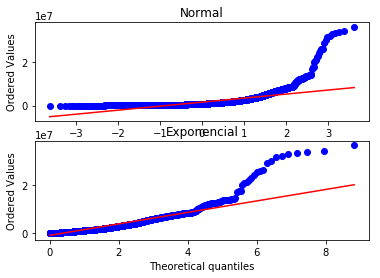

In [225]:
# Separa as linhas que contém certa tag
funny = you_analysis[you_analysis['tags'].str.contains('funny')]

plt.subplot(211)
scipy.stats.probplot(funny.views, dist="norm", plot = plt);
plt.title('Normal');

plt.subplot(212)
scipy.stats.probplot(funny.views, dist="expon", plot = plt);
plt.title('Exponencial');

In [229]:
funny.describe()

,views,category_id
count,4.711000e+03,4711.000000
mean,1.567960e+06,22.606453
std,2.572852e+06,4.148321
min,2.585000e+03,1.000000
25%,3.341520e+05,23.000000
50%,7.812170e+05,23.000000
75%,1.695260e+06,24.000000
max,3.615211e+07,28.000000


### ANÁLISE DESCRITIVA

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS